# Análise exploratória de dados do Enem
- Neste projeto, irei realizar uma análise exploratória dos microdados do Enem 2022. O objetivo consiste em desvendar padrões e insights sobre aspectos educacionais do Brasil e do exame, que tem papel imprescindível na sociedade. Para isso, técnicas de análise, exploração, limpeza e visualização de dados serão abordadas.

Sobre o Enem:

- O Exame Nacional do Ensino Médio (Enem) tem como objetivo primordial aferir se aqueles que dele participam demonstram, ao final do ensino médio, individualmente, domínio dos princípios científicos e tecnológicos que presidem a produção moderna e se detêm conhecimento das formas contemporâneas de linguagem.  
- A estrutura conta com 4 (quatro) provas objetivas, uma de cada área do conhecimento, contendo 45 (quarenta  e  cinco) questões de múltipla escolha e uma redação.
- Descrição das Áreas de Conhecimento e Componentes Curriculares do Enem: Linguagens, Códigos e suas tecnologias (Língua Portuguesa, Literatura, Língua Estrangeira, Artes, Educação Física e Tecnologias da Informação e Comunicação), Ciências Humanas e suas tecnologias (História, Geografia, Filosofia e Sociologia), Ciências da Natureza e suas tecnologias (Química, Física e Biologia), Matemática e suas tecnologias (Matemática).
- Em 2022, as provas foram aplicadas nos dias 13 e 20 de novembro de 2021, sendo que no primeiro dia os participantes realizaram as provas de Linguagens, Códigos e suas tecnologias e Redação e de Ciências Humanas e suas tecnologias e, no segundo, as provas de Ciências da Natureza e suas tecnologias e Matemática e suas tecnologias. 
- Além dos cadernos regulares foram disponibilizados os cadernos ampliados, superampliados, ledor (correspondente ao caderno em braille) e a videoprova, conforme a condição de acessibilidade necessária ao participante. 
- Para cada prova aplicada, são produzidos quatro tipos de cadernos, contendo as mesmas questões, mas organizadas em ordem diferente. Essa diversidade dos cadernos de prova tem como objetivo dificultar as fraudes durante a aplicação do Exame.   
- Na edição do Enem de 2022, os participantes realizaram o preenchimento facultativo do questionário intitulado “Hábitos de estudo dos participantes do Enem em contexto de pandemia”. Esse questionário buscou levantar informações não-cognitivas sobre a rotina de estudos e estratégias de preparação para o Enem adotadas pelos participantes durante o segundo ano de pandemia, quando estavam em vigor diferentes modalidades educacionais (presencial, híbrida, remota). Os resultados oferecem subsídios para as políticas públicas de acesso e permanência na Educação Superior, considerando o cenário de ruptura  dos  processos  educacionais  imposto  pela  pandemia  e  as  demandas  por  estratégias  de autorregulação por jovens e adultos para continuidade dos estudos e aprendizagem ao longo da vida. 

Sobre os microdados:

- Os microdados se constituem no menor nível de desagregação de dados recolhidos por pesquisas, avaliações e exames realizados. No caso do Enem, os dados estão por participante. Nunca constaram nos dados divulgados quaisquer variáveis que permitissem a identificação direta do 
participante, tais como nome, logradouro do endereço, e-mail, número do CPF, data de nascimento, 
dentre outras. Inclusive, o próprio número de inscrição real do participante é substituído por uma máscara gerada sequencialmente. Tratam-se, portanto, de dados anonimizados.

#### 1. Importando as bibliotecas

In [2]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize all the columns.
pd.set_option('display.max_columns', None)

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

#### 2. Coletando os dados
Há três tabelas disponíveis para análise:
1. MICRODADOS_ENEM_2022.csv : Informações gerais sobre a realização das provas, a caracterização do participante e da escola que ele declarou ter frequentado, e as notas das provas objetivas e da redação.
2. ITENS_PROVA_2022.csv : Informações gerais sobre os itens das provas.
3. QUEST_HAB_ESTUDO.csv : Informações sobre as respostas dos participantes ao questionário de hábitos de estudo durante o segundo ano da pandemia.

In [26]:
# itens = pd.read_csv("D:\MLProjects\DadosEnem\ITENS_PROVA_2022.csv", sep=';', encoding='ISO-8859-1')
hab_estudo = pd.read_csv("D:\MLProjects\DadosEnem\QUEST_HAB_ESTUDO.csv", sep=';', encoding='ISO-8859-1')

In [27]:
# Reading large data in separate chunks, then concatening into a single dataframe again.
chunk_size = 50_000
chunks = []
microdados_path = "D:\MLProjects\DadosEnem\MICRODADOS_ENEM_2022.csv"
for chunk in pd.read_csv(microdados_path, sep=';', encoding='ISO-8859-1', chunksize=chunk_size):
   chunks.append(chunk)

microdados = pd.concat(chunks, ignore_index=True)

#### 3.0 Entendimento inicial dos dados e limpeza dos dados
- Nesta etapa irei observar superficialmente os dados, obtendo dimensões, tipos de dados das variáveis, valores nulos e duplicados, estatísticas descritivas, entre outros.
- Será realizada a limpeza deles também. Irei remover colunas desnecessárias, converter variáveis para os tipos de dado corretos, reduzir o tamanho do dataset, tratar valores nulos e outliers, entre outras tarefas.

#### 3.1 Dicionário de variáveis
- O dicionário de variáveis encontra-se em 'input/dictionary/Dicionário_Microdados_Enem_2022.xslx

##### 3.2 Microdados

In [28]:
microdados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [29]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [30]:
print(f'O dataset possui {microdados.shape[0]} linhas e {microdados.shape[1]} colunas.')

O dataset possui 3476105 linhas e 76 colunas.


#### 3.3 Valores nulos e duplicados
- Investigarei valores nulos e duplicados a fim de tratá-los.

In [31]:
microdados['NU_INSCRICAO'].duplicated().sum()

0

In [32]:
microdados.duplicated().sum()

0

In [33]:
null_df = (microdados.isna().sum() / len(microdados) * 100).to_frame().rename(columns={0: 'null_pct'})
null_df['null_count'] = microdados.isna().sum()
null_df.sort_values(by=['null_pct'], ascending=False).head(35)

,null_pct,null_count
TP_LOCALIZACAO_ESC,72.614636,2524161
CO_UF_ESC,72.614636,2524161
TP_SIT_FUNC_ESC,72.614636,2524161
TP_DEPENDENCIA_ADM_ESC,72.614636,2524161
SG_UF_ESC,72.614636,2524161
CO_MUNICIPIO_ESC,72.614636,2524161
NO_MUNICIPIO_ESC,72.614636,2524161
TP_ENSINO,63.673594,2213361
NU_NOTA_CN,32.240396,1120710
CO_PROVA_MT,32.240396,1120710


- Não há observações duplicadas no dataset.
- Variáveis referentes à escola possuem um alto percentual de nulos, acima de 70%, e portanto deverão ser removidas. Da mesma forma, a variável TP_ENSINO.
- É possível ver um padrão nas variáveis referentes à nota e código de prova, possuindo o mesmo percentual de nulos para cada dia de aplicação (32% para as provas de ciências da natureza e matemática e 28.2% para as provas de ciências humanas, linguagens e suas tecnologias e redação). Provavelmente esses valores nulos representam alunos que não compareceram ou que foram eliminados, vamos investigar adiante.

In [34]:
# Searching for null values in the days when the student was not present for the second day of the exam.
segundo_dia = ['CO_PROVA_CN',
 'NU_NOTA_CN',
 'TX_RESPOSTAS_CN',
 'TX_GABARITO_CN',
 'CO_PROVA_MT',
 'NU_NOTA_MT',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_MT']
microdados[segundo_dia].loc[(microdados['TP_PRESENCA_MT'] == 0) & (microdados['TP_PRESENCA_CN'] == 0)].isna().sum()

CO_PROVA_CN        1119133
NU_NOTA_CN         1119133
TX_RESPOSTAS_CN    1119133
TX_GABARITO_CN     1119133
CO_PROVA_MT        1119133
NU_NOTA_MT         1119133
TX_RESPOSTAS_MT    1119133
TX_GABARITO_MT     1119133
dtype: int64

In [35]:
# Searching for null values in the days when the student was eliminated for the second day of the exam.
microdados[segundo_dia].loc[(microdados['TP_PRESENCA_MT'] == 2) & (microdados['TP_PRESENCA_CN'] == 2)].isna().sum()

CO_PROVA_CN        1577
NU_NOTA_CN         1577
TX_RESPOSTAS_CN    1577
TX_GABARITO_CN     1577
CO_PROVA_MT        1577
NU_NOTA_MT         1577
TX_RESPOSTAS_MT    1577
TX_GABARITO_MT     1577
dtype: int64

In [36]:
# Searching for null values in the days when the student was not present for the first day of the exam.
primeiro_dia = ['CO_PROVA_CH', 'CO_PROVA_LC', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']
microdados[primeiro_dia].loc[(microdados['TP_PRESENCA_CH'] == 0) & (microdados['TP_PRESENCA_LC'] == 0)].isna().sum()

CO_PROVA_CH          977981
CO_PROVA_LC          977981
NU_NOTA_CH           977981
NU_NOTA_LC           977981
TX_RESPOSTAS_CH      977981
TX_RESPOSTAS_LC      977981
TX_GABARITO_CH       977981
TX_GABARITO_LC       977981
TP_STATUS_REDACAO    977981
NU_NOTA_COMP1        977981
NU_NOTA_COMP2        977981
NU_NOTA_COMP3        977981
NU_NOTA_COMP4        977981
NU_NOTA_COMP5        977981
NU_NOTA_REDACAO      977981
dtype: int64

In [37]:
# Searching for null values in the days when the student was eliminated for the first day of the exam.
microdados[primeiro_dia].loc[(microdados['TP_PRESENCA_CH'] == 2) & (microdados['TP_PRESENCA_LC'] == 2)].isna().sum()

CO_PROVA_CH          4682
CO_PROVA_LC          4682
NU_NOTA_CH           4682
NU_NOTA_LC           4682
TX_RESPOSTAS_CH      4682
TX_RESPOSTAS_LC      4682
TX_GABARITO_CH       4682
TX_GABARITO_LC       4682
TP_STATUS_REDACAO    4682
NU_NOTA_COMP1        4682
NU_NOTA_COMP2        4682
NU_NOTA_COMP3        4682
NU_NOTA_COMP4        4682
NU_NOTA_COMP5        4682
NU_NOTA_REDACAO      4682
dtype: int64

In [38]:
microdados['TP_PRESENCA_CH'].value_counts(normalize=True) * 100

TP_PRESENCA_CH
1    71.730917
0    28.134392
2     0.134691
Name: proportion, dtype: float64

In [39]:
microdados['TP_PRESENCA_MT'].value_counts(normalize=True) * 100

TP_PRESENCA_MT
1    67.759604
0    32.195029
2     0.045367
Name: proportion, dtype: float64

- É possível perceber que todas as observações que contêm valores nulos em variáveis contendo informações sobre as provas ocorrem por não comparecimento ou eliminação do estudante.
- Considerando que variáveis contendo informações sobre o código da prova, gabaritos e respostas serão removidas porque não são relevantes para a análise, e considerando que quando um estudante não comparece para realizar a prova o seu resultado é apresentado como 0, irei imputar as variáveis correspondentes à nota com 0 para cada área do conhecimento do primeiro e do segundo dia de provas.
- Para a variável referente ao status da redação, atribuirei valores nulos como 'em branco'. 
- Já para os casos em que o estudante é eliminado, irei simplesmente remover essas observações, uma vez que o resultado final será 'NU', indicando não utilizável, e dado o número extremamente reduzido desse acontecimento, tornando-o dispensável para a análise.

In [40]:
clean_microdados = microdados.copy()

# Dropping eliminated records.
eliminated_records = clean_microdados.loc[(clean_microdados['TP_PRESENCA_CN'] == 2) 
                                          | (clean_microdados['TP_PRESENCA_CH'] == 2) 
                                          | (microdados['TP_PRESENCA_LC'] == 2) 
                                          | (microdados['TP_PRESENCA_MT'] == 2)].index
clean_microdados = clean_microdados.drop(eliminated_records)

# Imputing the grade as zero for those who didn't do the respective exam day.
to_impute_grade = ['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
clean_microdados[to_impute_grade] = clean_microdados[to_impute_grade].fillna(0)
clean_microdados['TP_STATUS_REDACAO'] = clean_microdados['TP_STATUS_REDACAO'].fillna('Em Branco')

#### 3.4 Removendo colunas desnecessárias
- É possível perceber que temos um grande número de colunas. Observando o dicionário de variáveis, muitas dessas não nos interessam, e portanto, serão removidas. Entram nesse grupo:
    - Variáveis informando códigos (códigos de prova para cada área do conhecimento, de cidades, unidades federativas, entre outros).
    - Variáveis que podem introduzir viés na análise, como as que identificam cor e raça.
    - Variáveis com gabaritos e respostas de questoes.
    - Variáveis informando nacionalidade, número de inscrição e ano de conclusão do ensino médio. 
    - Variáveis com um identificador único para cada estudante.
    - Variáveis contendo respostas para perguntas do questionário que não trazem valor para a análise.
    - Variáveis com alto percentual de valores nulos, como visto acima.

In [41]:
# Defining columns to drop.
to_drop = ['NU_INSCRICAO', 'NU_ANO', 'TP_NACIONALIDADE', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 
           'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 
           'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_ENSINO', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 
           'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 
           'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 
           'TX_GABARITO_MT', 'Q005', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 
           'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q023']
clean_microdados = clean_microdados.drop(columns=to_drop)
clean_microdados.shape

(3469856, 32)

Ótimo! Já foi possível reduzir o número de variáveis de 76 para 32!

#### 3.5 Alterando variáveis
- De forma geral, variáveis de natureza categórica estão com tipos numéricos. Irei convertê-las com os respectivos valores categóricos a fim de tornar a análise interpretável e de fácil entendimento. Ao mesmo tempo em que converto, irei unir/dropar categorias, de acordo com o melhor critério.
- Irei também padronizar os valores e renomear colunas para melhor entendimento.

In [42]:
# Standardazing features names, formatting and renaming them.
clean_microdados.columns = [x.lower() for x in clean_microdados.columns]

prefixes_to_remove = ['tp_', 'in_', 'sg_', 'nu_', 'no_']
clean_microdados.columns = clean_microdados.columns.to_series().replace(to_replace='^(' + '|'.join(prefixes_to_remove) + ')', value='', regex=True)

to_rename = {'q001': 'escolaridade_pai', 
             'q002': 'escolaridade_mae',
             'q003': 'ocupacao_pai',
             'q004': 'ocupacao_mae',
             'q006': 'renda_familiar_mensal',
             'q022': 'possui_celular_em_casa',
             'q024': 'possui_computador_em_casa',
             'q025': 'acesso_internet_em_casa',
             'st_conclusao': 'status_conclusao_ensino_medio'}

clean_microdados = clean_microdados.rename(columns=to_rename)

In [43]:
# Replacing numeric values by categorical values in categorical features in numeric data type. 
# Merging similar age categories into one, and assigning them a categorical value for better analysis interpretation.
faixa_etaria_mapping = {
    'Adolescente (< 18)': [1, 2],                   # < 18
    'Jovem adulto (18-24)': [3, 4, 5, 6, 7, 8, 9],  # 18-24
    'Adulto jovem (25-35)': [10, 11, 12],           # 25-35
    'Adulto de meia idade (36-45)': [13, 14],       # 36-45
    'Meia idade (46-55)': [15, 16],                 # 46-55
    'Pré aposentadoria (56-65)': [17, 18],          # 56-65
    'Idoso (> 66)': [19, 20]                        # > 66
}

replaced_faixa_etaria = dict()

for group, keys in faixa_etaria_mapping.items():
    for key in keys:
        replaced_faixa_etaria[key] = group

clean_microdados['faixa_etaria'] = clean_microdados['faixa_etaria'].replace(to_replace=replaced_faixa_etaria)

In [44]:
# Replacing estado civil
estado_civil_mapping = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/União Estável',
    3: 'Divorciado(a)/Separado(a)',
    4: 'Viúvo(a)'
}
clean_microdados['estado_civil'] = clean_microdados['estado_civil'].replace(estado_civil_mapping)

# Replacing high school conclusion situation.
st_conclusao_mapping = {
    1: 'Concluído',
    2: 'Último ano',
    3: 'Cursando',
    4: 'Não concluído'
}
clean_microdados['status_conclusao_ensino_medio'] = clean_microdados['status_conclusao_ensino_medio'].replace(st_conclusao_mapping)

# Replacing school type.
escola_mapping = {
    1: 'Não respondeu',
    2: 'Pública',
    3: 'Privada'
}
clean_microdados['escola'] = clean_microdados['escola'].replace(escola_mapping)

# Replacing presenca and lingua.
clean_microdados[['presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt']] = clean_microdados[['presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt']].replace({1: 'Presente', 0: 'Ausente'})
clean_microdados['lingua'] = clean_microdados['lingua'].replace({0: 'Inglês', 1: 'Espanhol'})

# Replacing status_redacao
status_redacao_mapping = {
    1: 'Sem problemas',
    2: 'Anulada',
    3: 'Cópia texto motivador',
    4: 'Em branco',
    6: 'Fuga ao tema', 
    7: 'Tipo textual não atendido',
    8: 'Texto insuficiente',
    9: 'Parte desconectada'
}
clean_microdados['status_redacao'] = clean_microdados['status_redacao'].replace(status_redacao_mapping)

# Replacing questions answers.
escolaridade_mapping = {
    'A': 'Nunca estudou',
    'B': 'Ensino fundamental incompleto',
    'C': 'Ensino fundamental incompleto',
    'D': 'Ensino fundamental completo',
    'E': 'Ensino médio completo',
    'F': 'Ensino superior completo',
    'G': 'Pós-graduação',
    'H': 'Não sei'
}
clean_microdados['escolaridade_pai'] = clean_microdados['escolaridade_pai'].replace(escolaridade_mapping)
clean_microdados['escolaridade_mae'] = clean_microdados['escolaridade_mae'].replace(escolaridade_mapping)

renda_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.212,00',
    'C': 'R$ 1.212,01 - R$ 1.818,00',
    'D': 'R$ 1.818,01 - R$ 3.030,00',
    'E': 'R$ 3.030,01 - R$ 4.848,00',
    'F': 'R$ 4.848,01 - R$ 7.272,00',
    'G': 'R$ 7.272,01 - R$ 10.908,00',
    'H': 'R$ 10.908,01 - R$ 18.180,00',
    'I': 'R$ 18.180,01 - R$ 24.240,00',
    'J': 'Acima de R$ 24.240,00'
}
clean_microdados['renda_familiar_mensal'] = clean_microdados['renda_familiar_mensal'].replace(renda_mapping)

computador_celular_mapping = {
    'A': 'Não',
    'B': 'Um',
    'C': 'Dois ou mais',
    'D': 'Dois ou mais',
    'E': 'Dois ou mais'
}
clean_microdados['possui_celular_em_casa'] = clean_microdados['possui_celular_em_casa'].replace(computador_celular_mapping)
clean_microdados['possui_computador_em_casa'] = clean_microdados['possui_computador_em_casa'].replace(computador_celular_mapping)

internet_mapping = {
    'A': 'Não', 
    'B': 'Sim'
}
clean_microdados['acesso_internet_em_casa'] = clean_microdados['acesso_internet_em_casa'].replace(internet_mapping)

treineiro_mapping = {
    0: 'Não',
    1: 'Sim'
}
clean_microdados['treineiro'] = clean_microdados['treineiro'].replace(treineiro_mapping)

#### 3.6 Otimização de memória
- Irei converter os tipos das variáveis para tipos que consomem menos memória sem perder informação, a fim de otimizar a análise e manipulação dos dados. 
- Após isso irei salvar o dataset resultante em um formato parquet, uma vez que o csv não mantém os tipos convertidos. 
- Uma vez que as notas vão de 0 a 1000 e têm precisão de 1 casa decimal, converterei-as de float64 para float32. Não será utilizado float16 pois o pyarrow não suporta esse tipo e não será possível salvar em parquet.
- Variáveis com um número limitado de categorias exclusivas serão convertidas para category.

In [45]:
# Obtaining and converting columns to lower memory consumption data types.
to_float32 = clean_microdados.select_dtypes('float64').columns.tolist()
to_category = clean_microdados.select_dtypes('object').columns.tolist()
to_category.remove('municipio_prova')

clean_df = clean_microdados.copy()
clean_df[to_float32] = clean_df[to_float32].astype('float32')
clean_df[to_category] = clean_df[to_category].astype('category')

In [46]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3469856 entries, 0 to 3476104
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   faixa_etaria                   category
 1   sexo                           category
 2   estado_civil                   category
 3   status_conclusao_ensino_medio  category
 4   escola                         category
 5   treineiro                      category
 6   municipio_prova                object  
 7   uf_prova                       category
 8   presenca_cn                    category
 9   presenca_ch                    category
 10  presenca_lc                    category
 11  presenca_mt                    category
 12  nota_cn                        float32 
 13  nota_ch                        float32 
 14  nota_lc                        float32 
 15  nota_mt                        float32 
 16  lingua                         category
 17  status_redacao                 c

In [47]:
clean_df.sample(5)

,faixa_etaria,sexo,estado_civil,status_conclusao_ensino_medio,escola,treineiro,municipio_prova,uf_prova,presenca_cn,presenca_ch,presenca_lc,presenca_mt,nota_cn,nota_ch,nota_lc,nota_mt,lingua,status_redacao,nota_comp1,nota_comp2,nota_comp3,nota_comp4,nota_comp5,nota_redacao,escolaridade_pai,escolaridade_mae,ocupacao_pai,ocupacao_mae,renda_familiar_mensal,possui_celular_em_casa,possui_computador_em_casa,acesso_internet_em_casa
2501018,Adolescente (< 18),M,Solteiro(a),Último ano,Pública,Não,Jiquiriçá,BA,Presente,Presente,Presente,Presente,556.099976,583.299988,526.700012,412.200012,Espanhol,Sem problemas,140.0,180.0,120.0,140.0,140.0,720.0,Ensino médio completo,Ensino fundamental completo,A,B,"Até R$ 1.212,00",Dois ou mais,Não,Não
452891,Jovem adulto (18-24),F,Solteiro(a),Último ano,Pública,Não,Arapiraca,AL,Presente,Presente,Presente,Presente,445.799988,407.299988,444.799988,447.100006,Espanhol,Sem problemas,100.0,160.0,100.0,120.0,120.0,600.0,Ensino fundamental incompleto,Ensino médio completo,C,B,"R$ 1.212,01 - R$ 1.818,00",Dois ou mais,Um,Sim
3436017,Adulto de meia idade (36-45),M,Divorciado(a)/Separado(a),Concluído,Não respondeu,Não,Piripiri,PI,Presente,Presente,Presente,Presente,396.500000,400.000000,439.000000,358.299988,Espanhol,Sem problemas,120.0,40.0,40.0,120.0,40.0,360.0,Nunca estudou,Nunca estudou,B,B,"R$ 1.212,01 - R$ 1.818,00",Um,Não,Sim
1935494,Adolescente (< 18),F,Solteiro(a),Cursando,Não respondeu,Sim,Mauriti,CE,Presente,Presente,Presente,Presente,541.799988,508.500000,463.799988,556.000000,Espanhol,Sem problemas,160.0,120.0,160.0,160.0,180.0,780.0,Ensino fundamental completo,Pós-graduação,D,D,"Até R$ 1.212,00",Dois ou mais,Um,Sim
1498894,Adolescente (< 18),F,Solteiro(a),Último ano,Pública,Não,São Vicente,SP,Presente,Presente,Presente,Presente,404.399994,529.799988,413.500000,547.099976,Inglês,Sem problemas,100.0,200.0,120.0,160.0,80.0,660.0,Ensino médio completo,Ensino médio completo,C,B,"R$ 1.212,01 - R$ 1.818,00",Dois ou mais,Não,Sim


In [5]:
# path = 'D:\\MLProjects\\DadosEnem\\clean_df.parquet'
# clean_df.to_parquet(path, index=False)

In [3]:
# Reading the memory optimized data.
path = 'D:\\MLProjects\\DadosEnem\\clean_df.parquet'
df = pd.read_parquet(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469856 entries, 0 to 3469855
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   faixa_etaria                   category
 1   sexo                           category
 2   estado_civil                   category
 3   status_conclusao_ensino_medio  category
 4   escola                         category
 5   treineiro                      category
 6   municipio_prova                object  
 7   uf_prova                       category
 8   presenca_cn                    category
 9   presenca_ch                    category
 10  presenca_lc                    category
 11  presenca_mt                    category
 12  nota_cn                        float32 
 13  nota_ch                        float32 
 14  nota_lc                        float32 
 15  nota_mt                        float32 
 16  lingua                         category
 17  status_redacao             

Excelente! Através da limpeza dos dados foi possível reduzir o tamanho do dataset de +2 GB para +228.3 MB, quase 10%! Agora poderemos realizar a análise e manipulação dos dados de forma eficiente.

#### 4.0 Análise exploratória de dados
- Irei explorar os dados, a fim de obter insights sobre a educação do país no contexto do maior exame de admissão em universidades e responder às perguntas abaixo. Desse modo, análises univariada, bivariada e multivariada serão realizadas. 
- Inicialmente, irei criar uma variável que informa a nota média geral no exame, para cada candidato. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados. 

In [7]:
# Creating average grade on ENEM variable.
df['nota_media'] = (df['nota_lc'] + df['nota_ch'] + df['nota_cn'] + df['nota_mt'] + df['nota_redacao']) / 5

#### 4.1 Estatística descritiva
- Abaixo irei acessar algumas estatísticas descritivas a fim de obter uma visão geral das variáveis numéricas, verificando extremos, quantis, média, etc.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nota_cn,3469856.0,336.572510,239.071579,0.0,0.0,442.899994,513.200012,875.299988
nota_ch,3469856.0,378.441498,246.930573,0.0,0.0,489.799988,560.400024,839.200012
nota_lc,3469856.0,371.606689,241.897171,0.0,0.0,483.000000,554.200012,801.000000
nota_mt,3469856.0,368.181458,270.775238,0.0,0.0,453.100006,578.200012,985.700012
nota_comp1,3469856.0,85.745872,62.200432,0.0,0.0,120.000000,140.000000,200.000000
nota_comp2,3469856.0,101.237793,77.978226,0.0,0.0,120.000000,180.000000,200.000000
nota_comp3,3469856.0,82.497803,62.287674,0.0,0.0,100.000000,120.000000,200.000000
nota_comp4,3469856.0,92.961670,68.554764,0.0,0.0,120.000000,140.000000,200.000000
nota_comp5,3469856.0,81.746513,72.059608,0.0,0.0,80.000000,140.000000,200.000000
nota_redacao,3469856.0,444.189758,331.321289,0.0,0.0,560.000000,700.000000,1000.000000


É possível perceber que as notas médias para cada área do conhecimento nos dois dias de prova é bem baixa. Entretanto, essa medida é afetada pelo alto número de participantes que não compareceram e, portanto, ficam com nota zero. Assim, iremos investigar mais adiante de forma estratificada essas medidas. Ademais, de início, analisando valores máximos e mínimos, não há observações inconsistentes.

#### 4.2 Variáveis categóricas e numéricas
- Irei acessar quais são as variáveis categóricas e numéricas a priori, para ter um senso de quais visualizações e abordagens de análise escolher, além de formular perguntas a serem feitas aos dados.
- Irei acessar a cardinalidade de cada variável categórica. Este é um ponto importante, pois pode guiar possíveis ajustes e escolhas de visualizações.

In [9]:
categorical_features = df.select_dtypes('category').columns.to_list()
numerical_features = df.select_dtypes('number').columns.to_list()
print(f'Há {len(categorical_features)} variáveis categóricas. São elas: {categorical_features}')
print(f'Há {len(numerical_features)} variáveis numéricas. São elas: {numerical_features}')

Há 21 variáveis categóricas. São elas: ['faixa_etaria', 'sexo', 'estado_civil', 'status_conclusao_ensino_medio', 'escola', 'treineiro', 'uf_prova', 'presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt', 'lingua', 'status_redacao', 'escolaridade_pai', 'escolaridade_mae', 'ocupacao_pai', 'ocupacao_mae', 'renda_familiar_mensal', 'possui_celular_em_casa', 'possui_computador_em_casa', 'acesso_internet_em_casa']
Há 11 variáveis numéricas. São elas: ['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_comp1', 'nota_comp2', 'nota_comp3', 'nota_comp4', 'nota_comp5', 'nota_redacao', 'nota_media']


In [10]:
for feature in categorical_features:
    print(feature)
    print(df[feature].nunique())

faixa_etaria
7
sexo
2
estado_civil
5
status_conclusao_ensino_medio
4
escola
3
treineiro
2
uf_prova
27
presenca_cn
2
presenca_ch
2
presenca_lc
2
presenca_mt
2
lingua
2
status_redacao
9
escolaridade_pai
7
escolaridade_mae
7
ocupacao_pai
6
ocupacao_mae
6
renda_familiar_mensal
17
possui_celular_em_casa
3
possui_computador_em_casa
3
acesso_internet_em_casa
2


#### 5.0 Análise univariada

#### 5.1 Distribuições
- Irei analisar a distribuição dos dados, a fim de acessar valores típicos apresentados pelos candidatos em determinadas variáveis.

#### 5.2 Distribuição das variáveis demográficas

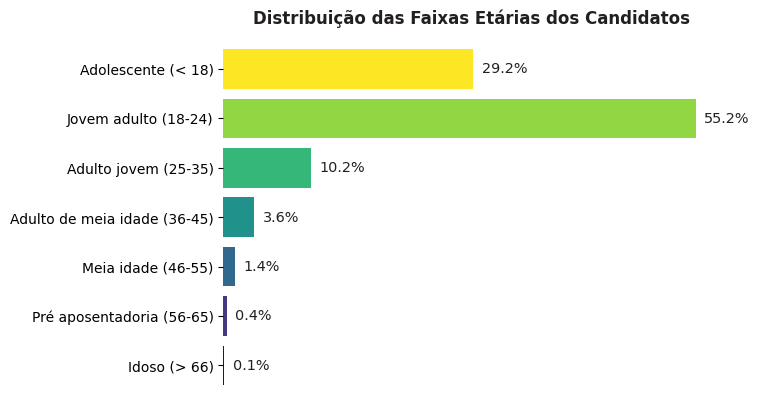

In [144]:
# Grouping the data by age bin.
age_grouped = df.groupby(['faixa_etaria'])[['faixa_etaria']].count().rename(columns={'faixa_etaria': 'count'}).reset_index()
age_grouped['pct'] = round(age_grouped['count'] / np.sum(age_grouped['count']) * 100, 2) 
age_grouped['limit_age'] = age_grouped['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grouped = age_grouped.sort_values(by=['limit_age'], ascending=False).reset_index(drop=True)

# Plotting and customizing.
colors = plt.cm.viridis(np.linspace(0, 1, len(uf_grouped)))

fig, ax = plt.subplots()

bars = ax.barh(y=age_grouped['faixa_etaria'], width=age_grouped['pct'], color=colors)
for index, value in enumerate(age_grouped['pct']):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', color=CINZA1, fontsize=10.4)
ax.set_title('Distribuição das Faixas Etárias dos Candidatos', color=CINZA1, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
plt.show()

É possível perceber que aproximadamente 85% dos candidatos têm até 24 anos, sendo adolescentes ou jovens adultos. Idosos e pessoas perto da idade de aposentadoria representam menos de 1% dessa população.

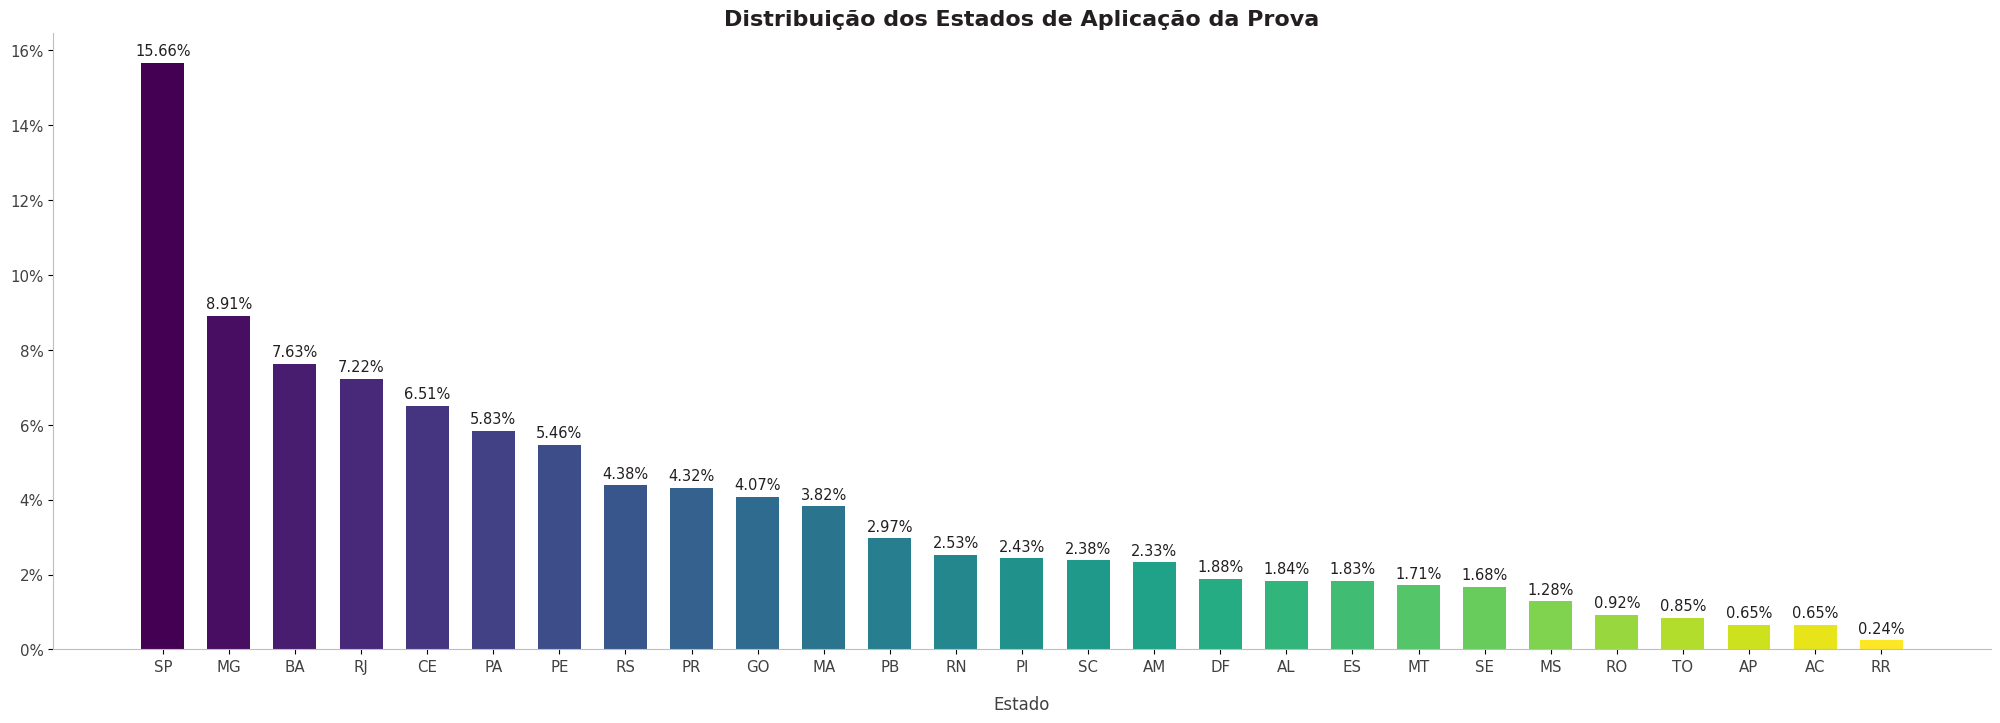

In [153]:
# Grouping the data by uf.
uf_grouped = df.groupby(['uf_prova'])[['uf_prova']].count().rename(columns={'uf_prova': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
uf_grouped['pct'] = round(uf_grouped['count'] / np.sum(uf_grouped['count']) * 100, 2) 

# Plotting and customizing.
colors = plt.cm.viridis(np.linspace(0, 1, len(uf_grouped)))

fig, ax = plt.subplots(figsize=(25, 8))
bars = ax.bar(x=uf_grouped['uf_prova'], height=uf_grouped['pct'], color=colors, width=0.65)
for bar, pct in zip(bars, uf_grouped['pct']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{pct}%', ha='center', color=CINZA1, fontsize=10.5)
ax.set_title('Distribuição dos Estados de Aplicação da Prova', color=CINZA1, fontweight='bold', fontsize=16)
ax.set_xlabel('Estado', labelpad=15, color=CINZA2, fontsize=12)
ax.set_xticks(ticks=uf_grouped['uf_prova'], labels=uf_grouped['uf_prova'], color=CINZA2, fontsize=10.8)
ax.set_yticks(ticks=np.arange(0, 17, 2), labels=[str(x) + '%' for x in range(0, 17, 2)], color=CINZA2, fontsize=10.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)
plt.show()

É possível perceber que São Paulo é o estado com o maior número de candidatos, representando 15.66% do total, enquanto estados do norte, como RO, TO, AP, AC e RR não concentram nem 1% da população de candidatos.

In [70]:
(df['escola'].value_counts(normalize=True) * 100).to_frame()

,proportion
escola,
Não respondeu,62.099753
Pública,31.793510
Privada,6.106738


In [71]:
(df['estado_civil'].value_counts(normalize=True) * 100).to_frame()

,proportion
estado_civil,
Solteiro(a),89.987048
Casado(a)/União Estável,4.767085
Não informado,3.694707
Divorciado(a)/Separado(a),1.448619
Viúvo(a),0.102540


In [72]:
(df['treineiro'].value_counts(normalize=True) * 100).to_frame()

,proportion
treineiro,
Não,85.252241
Sim,14.747759


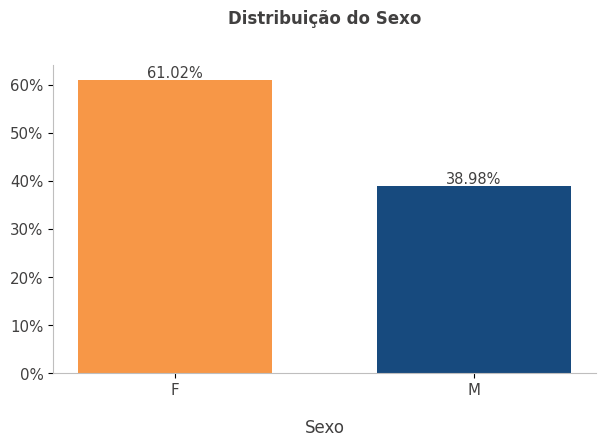

In [159]:
# Grouping the data by sex.
sex_grouped = df.groupby(['sexo'])[['sexo']].count().rename(columns={'sexo': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
sex_grouped['pct'] = round(sex_grouped['count'] / np.sum(sex_grouped['count']) * 100, 2) 

# Plotting and customizing.
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(x=sex_grouped['sexo'], height=sex_grouped['pct'], color=[LARANJA1, AZUL1], width=0.65)
for bar, pct in zip(bars, sex_grouped['pct']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax.set_title('Distribuição do Sexo', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax.set_xlabel('Sexo', labelpad=15, color=CINZA2, fontsize=12)
ax.set_xticks(ticks=sex_grouped['sexo'], labels=sex_grouped['sexo'], color=CINZA2, fontsize=10.8)
ax.set_yticks(ticks=np.arange(0, 61, 10), labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%'] , color=CINZA2, fontsize=10.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)
plt.show()

61% dos candidatos são mulheres, enquanto 39% são homens.

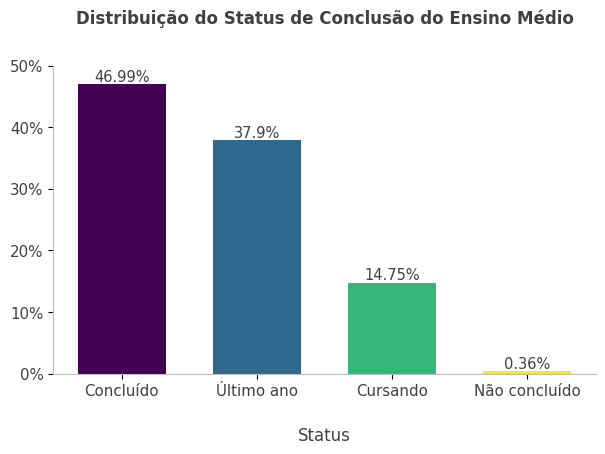

In [155]:
# Grouping the data by sex.
st_grouped = df.groupby(['status_conclusao_ensino_medio'])[['status_conclusao_ensino_medio']].count().rename(columns={'status_conclusao_ensino_medio': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
st_grouped['pct'] = round(st_grouped['count'] / np.sum(st_grouped['count']) * 100, 2) 

# Plotting and customizing.
colors = plt.cm.viridis(np.linspace(0, 1, len(st_grouped)))
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(x=st_grouped['status_conclusao_ensino_medio'], height=st_grouped['pct'], color=colors, width=0.65)
for bar, pct in zip(bars, st_grouped['pct']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax.set_title('Distribuição do Status de Conclusão do Ensino Médio', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax.set_xlabel('Status', labelpad=20, color=CINZA2, fontsize=12)
ax.set_xticks(ticks=st_grouped['status_conclusao_ensino_medio'], labels=st_grouped['status_conclusao_ensino_medio'], color=CINZA2, fontsize=10.8)
ax.set_yticks(ticks=np.arange(0, 51, 10), labels=['0%', '10%', '20%', '30%', '40%', '50%'] , color=CINZA2, fontsize=10.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)
plt.show()

85% dos candidatos já concluíram o ensino médio ou estão no último ano. Os 15% cursando representam treineiros, enquanto menos de 1% não concluíram nem estão cursando.

#### 5.3 Distribuição da presença em provas

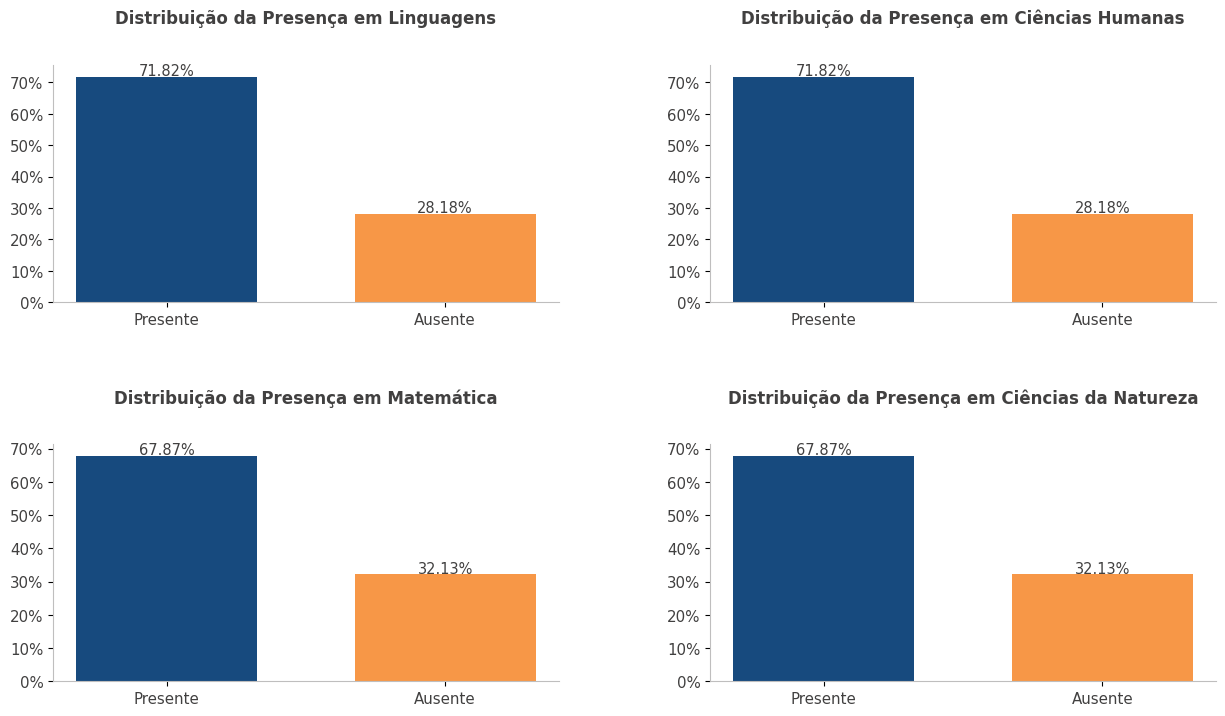

In [200]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.6)  # Adjust the width and height space between subplots

# Languages.
plc_grouped = df.groupby(['presenca_lc'])[['presenca_lc']].count().rename(columns={'presenca_lc': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
plc_grouped['pct'] = round(plc_grouped['count'] / np.sum(plc_grouped['count']) * 100, 2) 
bars = ax[0, 0].bar(x=plc_grouped['presenca_lc'], height=plc_grouped['pct'], color=[AZUL1, LARANJA1], width=0.65)
for bar, pct in zip(bars, plc_grouped['pct']):
    ax[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax[0, 0].set_title('Distribuição da Presença em Linguagens', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax[0, 0].set_xticks(ticks=plc_grouped['presenca_lc'], labels=plc_grouped['presenca_lc'], color=CINZA2, fontsize=10.8)
ax[0, 0].set_yticks(ticks=np.arange(0, 71, 10), labels=[str(x) + '%' for x in range(0, 71, 10)] , color=CINZA2, fontsize=10.8)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_color(CINZA9)
ax[0, 0].spines['bottom'].set_color(CINZA9)

# Human sciences.
pch_grouped = df.groupby(['presenca_ch'])[['presenca_ch']].count().rename(columns={'presenca_ch': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pch_grouped['pct'] = round(pch_grouped['count'] / np.sum(pch_grouped['count']) * 100, 2) 
bars = ax[0, 1].bar(x=pch_grouped['presenca_ch'], height=pch_grouped['pct'], color=[AZUL1, LARANJA1], width=0.65)
for bar, pct in zip(bars, pch_grouped['pct']):
    ax[0, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax[0, 1].set_title('Distribuição da Presença em Ciências Humanas', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax[0, 1].set_xticks(ticks=pch_grouped['presenca_ch'], labels=pch_grouped['presenca_ch'], color=CINZA2, fontsize=10.8)
ax[0, 1].set_yticks(ticks=np.arange(0, 71, 10), labels=[str(x) + '%' for x in range(0, 71, 10)] , color=CINZA2, fontsize=10.8)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_color(CINZA9)
ax[0, 1].spines['bottom'].set_color(CINZA9)

# Math.
pmt_grouped = df.groupby(['presenca_mt'])[['presenca_mt']].count().rename(columns={'presenca_mt': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pmt_grouped['pct'] = round(pmt_grouped['count'] / np.sum(pmt_grouped['count']) * 100, 2) 
bars = ax[1, 0].bar(x=pmt_grouped['presenca_mt'], height=pmt_grouped['pct'], color=[AZUL1, LARANJA1], width=0.65)
for bar, pct in zip(bars, pmt_grouped['pct']):
    ax[1, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax[1, 0].set_title('Distribuição da Presença em Matemática', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax[1, 0].set_xticks(ticks=pmt_grouped['presenca_mt'], labels=pmt_grouped['presenca_mt'], color=CINZA2, fontsize=10.8)
ax[1, 0].set_yticks(ticks=np.arange(0, 71, 10), labels=[str(x) + '%' for x in range(0, 71, 10)] , color=CINZA2, fontsize=10.8)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['left'].set_color(CINZA9)
ax[1, 0].spines['bottom'].set_color(CINZA9)

# Nature sciences.
pcn_grouped = df.groupby(['presenca_cn'])[['presenca_cn']].count().rename(columns={'presenca_cn': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pcn_grouped['pct'] = round(pcn_grouped['count'] / np.sum(pcn_grouped['count']) * 100, 2) 
bars = ax[1, 1].bar(x=pcn_grouped['presenca_cn'], height=pcn_grouped['pct'], color=[AZUL1, LARANJA1], width=0.65)
for bar, pct in zip(bars, pcn_grouped['pct']):
    ax[1, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax[1, 1].set_title('Distribuição da Presença em Ciências da Natureza', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax[1, 1].set_xticks(ticks=pcn_grouped['presenca_cn'], labels=pcn_grouped['presenca_cn'], color=CINZA2, fontsize=10.8)
ax[1, 1].set_yticks(ticks=np.arange(0, 71, 10), labels=[str(x) + '%' for x in range(0, 71, 10)] , color=CINZA2, fontsize=10.8)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['left'].set_color(CINZA9)
ax[1, 1].spines['bottom'].set_color(CINZA9)

plt.show()

É possível perceber uma taxa de desistência 4% maior nas provas do segundo dia, totalizando 32.13% de candidatos que não foram. Isso indica uma maior dificuldade dos estudantes em ciências exatas, as quais compõem as provas do segundo dia. De qualquer forma, ambos os dias apresentam uma alta taxa de desistência, o que é preocupante e revela como a educação brasileira ainda é precária. Há uma discrepância entre o nível do exame e o nível intelectual dos alunos. É provável que grande parte das desistências ocorram por despreparo / falta de confiança para realizar a prova.

#### 5.4 Distribuição das notas nas provas objetivas
- Para acessar a distribuição das notas nas provas objetivas, serão consideradas apenas as notas dos alunos que realizaram a prova. Dado o alto número de desistentes, que ficam com nota zero, medidas como a média e distribuições seriam afetadas pela grande quantidade de zeros e portanto distorceriam a nossa análise. Além disso, essas notas não nos forneceriam uma medida acurada do desempenho educacional dos candidatos, uma vez que muitos desistem não por razões aleatórias, mas por falta de preparo ou confiança.
- Irei analisar estatísticas descritivas, distribuições e outliers.

In [29]:
# Assessing average grade descriptive statistics.
# For the average grade, I will consider students that were present in both days of the exam. I will do this in order to obtain a more accurate performance measurement, although it will take into account a lower candidates sample. Considering students who were present in only one day for the calculation might skew the statistic, especially if the reasons for absence are non-random (e.g., students who were not prepared might have chosen to skip one day).
presente = df.loc[(df['presenca_cn'] == 'Presente') & (df['presenca_mt'] == 'Presente')
                  & (df['presenca_lc'] == 'Presente') & (df['presenca_ch'] == 'Presente')]
presente['nota_media'].describe().to_frame()

,nota_media
count,2.344823e+06
mean,5.434847e+02
std,8.804023e+01
min,0.000000e+00
25%,4.845200e+02
50%,5.405400e+02
75%,6.020599e+02
max,8.559800e+02


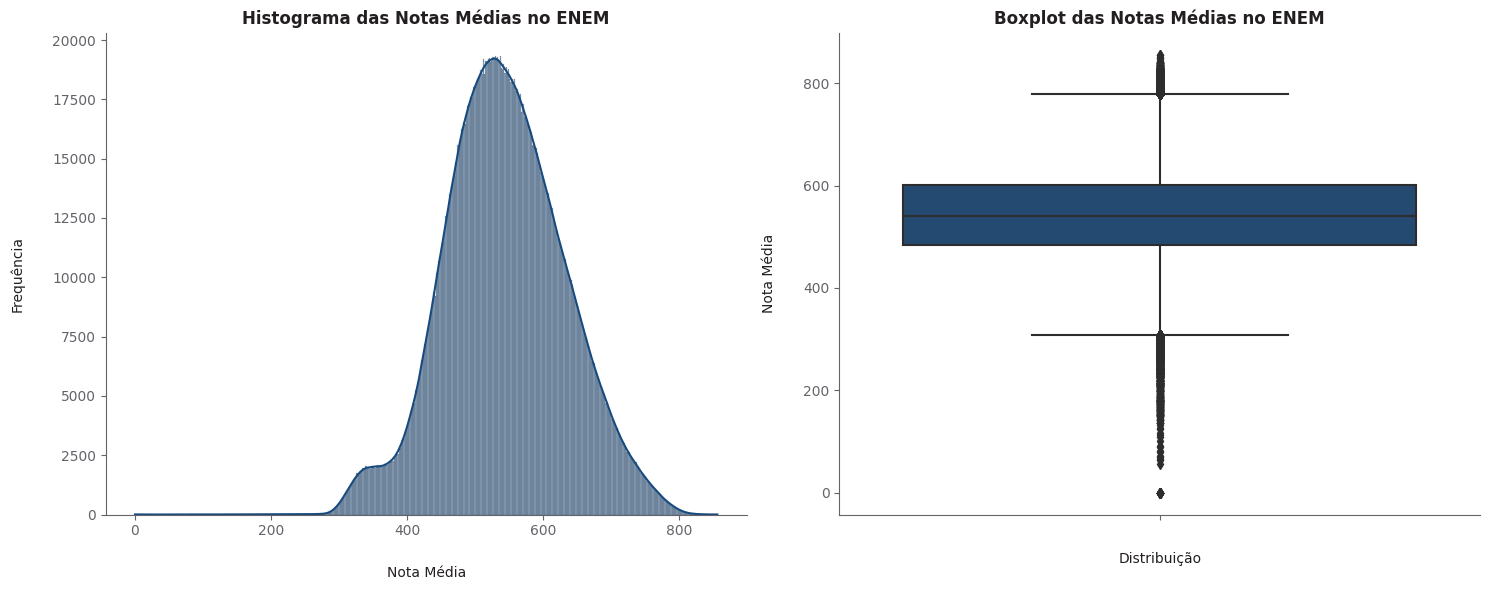

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=presente, x='nota_media', kde=True, ax=ax[0], color=AZUL1)
ax[0].set_title('Histograma das Notas Médias no ENEM', color=CINZA1, fontweight='bold')
ax[0].set_xlabel('Nota Média', color=CINZA1, labelpad=20)
ax[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
ax[0].tick_params(axis='x', colors=CINZA4)
ax[0].tick_params(axis='y', colors=CINZA4)
ax[0].spines['left'].set_color(CINZA4)
ax[0].spines['bottom'].set_color(CINZA4)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.boxplot(data=presente, y='nota_media', ax=ax[1], color=AZUL1, orient='v')
ax[1].set_title('Boxplot das Notas Médias no ENEM', color=CINZA1, fontweight='bold')
ax[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
ax[1].set_ylabel('Nota Média', color=CINZA1, labelpad=20)
ax[1].tick_params(axis='x', colors=CINZA4)
ax[1].tick_params(axis='y', colors=CINZA4)
ax[1].spines['left'].set_color(CINZA4)
ax[1].spines['bottom'].set_color(CINZA4)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

- A nota média geral para alunos que estavam presentes em ambos os dias é de aproximadamente 543.
- Observando os valores máximos e mínimos, não há notas incoerentes.
- Alguns alunos têm nota média 0, representando o valor mínimo. Isso ocorre em situações em que o aluno foi realizar o exame, ou seja, estava presente, mas deixou o gabarito e / ou a redação em branco, por exemplo.
- Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo, e candidatos que gabaritam a prova, ficando com uma nota elevada. Portanto, outliers não serão removidos.
- A nota média máxima no ENEM de 2022 foi aproximadamente 856.
- Analisando os percentis, metade dos alunos obtiveram uma nota de até 540, enquanto 75% obtiveram uma nota de até 602. Isso reflete a precariedade do sistema de ensino e um distanciamento do que é cobrado no ENEM para a realidade das escolas / educação.

In [20]:
# Obtaining first and second exam days dataframes with only present students data.
presente_cn_mt = df.loc[(df['presenca_cn'] == 'Presente') & (df['presenca_mt'] == 'Presente')]
presente_lc_ch = df.loc[(df['presenca_lc'] == 'Presente') & (df['presenca_ch'] == 'Presente')]

In [ ]:
# Assessing math and nature sciences descriptive statistics.
presente_cn_mt[['nota_cn', 'nota_mt']].describe().T

,count,mean,std,min,25%,50%,75%,max
nota_cn,2354874.0,495.932495,72.008659,0.0,440.5,485.600006,543.299988,875.299988
nota_mt,2354874.0,542.507141,116.022697,0.0,449.0,530.799988,622.400024,985.700012


- A nota média em ciências da natureza é aproximadamente 496. Em matemática, tem-se uma nota média um pouco maior, em torno de 542.5.
- Observando os valores máximos e mínimos, não há notas incoerentes.
- Observando os percentis, metade dos candidatos obtém uma nota de até 485.6 em ciências da natureza e 530.8 em matemática, valores bem baixos para um exame desse porte. Claramente, há uma distorção entre o nível do exame e o nível do que é ensinado nas escolas.

In [ ]:
# Assessing languagens and human sciences descriptive statistics.
presente_lc_ch[['nota_lc', 'nota_ch']].describe().T

,count,mean,std,min,25%,50%,75%,max
nota_lc,2491899.0,517.445435,77.555466,0.0,468.399994,525.500000,573.299988,801.000000
nota_ch,2491899.0,526.962463,81.482956,0.0,477.100006,529.900024,581.900024,839.200012


- A nota média em linguagens é aproximadamente 517.4. Em ciências humanas, a nota média é aproximadamente 527.
- Observando os valores máximos e mínimos, não há notas incoerentes.
- Metade dos candidatos obtém uma nota de até 525.5 em linguagens e 529.9 em ciências humanas.
- Da mesma forma, a maioria dos candidatos não performa bem no exame.

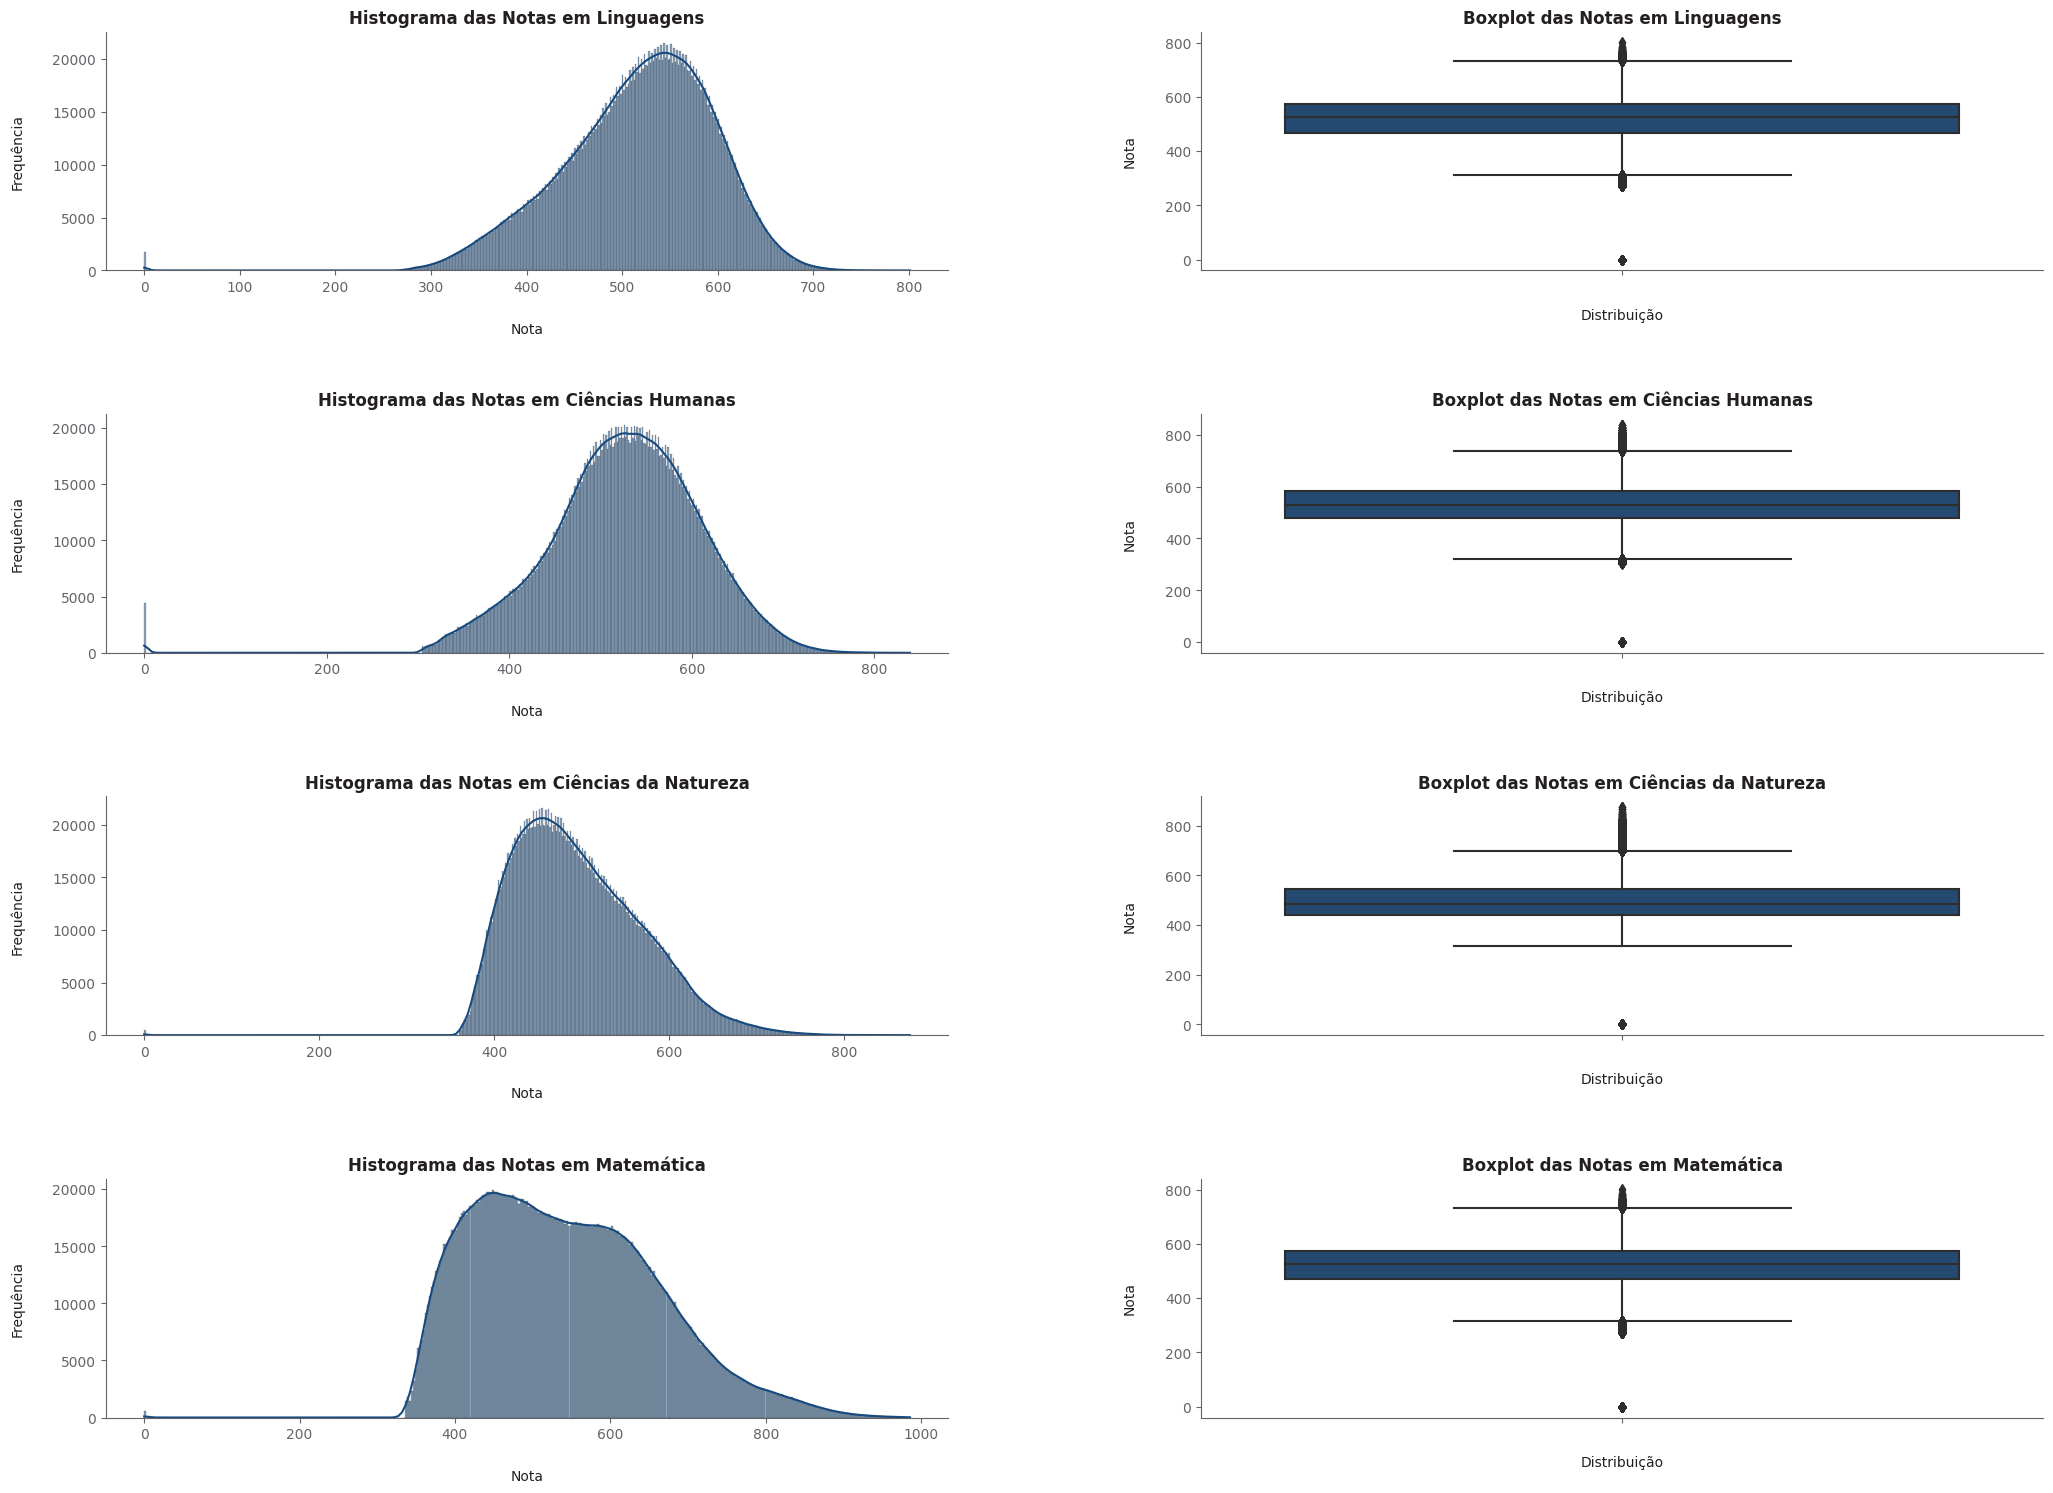

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(25, 18))
plt.subplots_adjust(wspace=0.3, hspace=0.6)  # Adjust the width and height space between subplots

# Languages.
sns.histplot(data=presente_lc_ch, x='nota_lc', kde=True, ax=ax[0, 0], color=AZUL1)
ax[0, 0].set_title('Histograma das Notas em Linguagens', color=CINZA1, fontweight='bold')
ax[0, 0].set_xlabel('Nota', color=CINZA1, labelpad=20)
ax[0, 0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
ax[0, 0].tick_params(axis='x', colors=CINZA4)
ax[0, 0].tick_params(axis='y', colors=CINZA4)
ax[0, 0].spines['left'].set_color(CINZA4)
ax[0, 0].spines['bottom'].set_color(CINZA4)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['top'].set_visible(False)

sns.boxplot(data=presente_lc_ch, y='nota_lc', ax=ax[0, 1], color=AZUL1, orient='v')
ax[0, 1].set_title('Boxplot das Notas em Linguagens', color=CINZA1, fontweight='bold')
ax[0, 1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
ax[0, 1].set_ylabel('Nota', color=CINZA1, labelpad=20)
ax[0, 1].tick_params(axis='x', colors=CINZA4)
ax[0, 1].tick_params(axis='y', colors=CINZA4)
ax[0, 1].spines['left'].set_color(CINZA4)
ax[0, 1].spines['bottom'].set_color(CINZA4)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['top'].set_visible(False)

# Human sciences.
sns.histplot(data=presente_lc_ch, x='nota_ch', kde=True, ax=ax[1, 0], color=AZUL1)
ax[1, 0].set_title('Histograma das Notas em Ciências Humanas', color=CINZA1, fontweight='bold')
ax[1, 0].set_xlabel('Nota', color=CINZA1, labelpad=20)
ax[1, 0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
ax[1, 0].tick_params(axis='x', colors=CINZA4)
ax[1, 0].tick_params(axis='y', colors=CINZA4)
ax[1, 0].spines['left'].set_color(CINZA4)
ax[1, 0].spines['bottom'].set_color(CINZA4)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)

sns.boxplot(data=presente_lc_ch, y='nota_ch', ax=ax[1, 1], color=AZUL1, orient='v')
ax[1, 1].set_title('Boxplot das Notas em Ciências Humanas', color=CINZA1, fontweight='bold')
ax[1, 1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
ax[1, 1].set_ylabel('Nota', color=CINZA1, labelpad=20)
ax[1, 1].tick_params(axis='x', colors=CINZA4)
ax[1, 1].tick_params(axis='y', colors=CINZA4)
ax[1, 1].spines['left'].set_color(CINZA4)
ax[1, 1].spines['bottom'].set_color(CINZA4)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)

# Nature sciences.
sns.histplot(data=presente_cn_mt, x='nota_cn', kde=True, ax=ax[2, 0], color=AZUL1)
ax[2, 0].set_title('Histograma das Notas em Ciências da Natureza', color=CINZA1, fontweight='bold')
ax[2, 0].set_xlabel('Nota', color=CINZA1, labelpad=20)
ax[2, 0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
ax[2, 0].tick_params(axis='x', colors=CINZA4)
ax[2, 0].tick_params(axis='y', colors=CINZA4)
ax[2, 0].spines['left'].set_color(CINZA4)
ax[2, 0].spines['bottom'].set_color(CINZA4)
ax[2, 0].spines['right'].set_visible(False)
ax[2, 0].spines['top'].set_visible(False)

sns.boxplot(data=presente_cn_mt, y='nota_cn', ax=ax[2, 1], color=AZUL1, orient='v')
ax[2, 1].set_title('Boxplot das Notas em Ciências da Natureza', color=CINZA1, fontweight='bold')
ax[2, 1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
ax[2, 1].set_ylabel('Nota', color=CINZA1, labelpad=20)
ax[2, 1].tick_params(axis='x', colors=CINZA4)
ax[2, 1].tick_params(axis='y', colors=CINZA4)
ax[2, 1].spines['left'].set_color(CINZA4)
ax[2, 1].spines['bottom'].set_color(CINZA4)
ax[2, 1].spines['right'].set_visible(False)
ax[2, 1].spines['top'].set_visible(False)

# Math.
sns.histplot(data=presente_cn_mt, x='nota_mt', kde=True, ax=ax[3, 0], color=AZUL1)
ax[3, 0].set_title('Histograma das Notas em Matemática', color=CINZA1, fontweight='bold')
ax[3, 0].set_xlabel('Nota', color=CINZA1, labelpad=20)
ax[3, 0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
ax[3, 0].tick_params(axis='x', colors=CINZA4)
ax[3, 0].tick_params(axis='y', colors=CINZA4)
ax[3, 0].spines['left'].set_color(CINZA4)
ax[3, 0].spines['bottom'].set_color(CINZA4)
ax[3, 0].spines['right'].set_visible(False)
ax[3, 0].spines['top'].set_visible(False)

sns.boxplot(data=presente_cn_mt, y='nota_lc', ax=ax[3, 1], color=AZUL1, orient='v')
ax[3, 1].set_title('Boxplot das Notas em Matemática', color=CINZA1, fontweight='bold')
ax[3, 1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
ax[3, 1].set_ylabel('Nota', color=CINZA1, labelpad=20)
ax[3, 1].tick_params(axis='x', colors=CINZA4)
ax[3, 1].tick_params(axis='y', colors=CINZA4)
ax[3, 1].spines['left'].set_color(CINZA4)
ax[3, 1].spines['bottom'].set_color(CINZA4)
ax[3, 1].spines['right'].set_visible(False)
ax[3, 1].spines['top'].set_visible(False)


In [24]:
print('Medida de assimetria:')
print(presente_cn_mt[['nota_cn', 'nota_mt']].skew())
print(presente_lc_ch[['nota_lc', 'nota_ch']].skew())

Medida de assimetria:
nota_cn    0.550293
nota_mt    0.485755
dtype: float32
nota_lc   -0.567102
nota_ch   -0.581576
dtype: float32


- Analisando as distribuições, os candidatos tendem a ir melhor nas provas do primeiro dia, sendo ciências da natureza a área do conhecimento em que é apresentado o pior desempenho. Matemática apresenta o melhor desempenho dentre as provas. Entretanto, isso se deve ao modelo do ENEM, em que naturalmente essa área do conhecimento fornece uma nota maior aos candidatos. Isso pode ser verificado observando a nota máxima nessa área do conhecimento, que é consideravelmente maior em relação as outras.
- De forma geral, todas as notas apresentam outliers acima e abaixo dos limites superior e inferior. Entretanto, estes não representam informação incoerente, uma vez que naturalmente alguns candidatos irão tirar zero (apesar de estarem presentes, provavelmente esses candidatos deixaram o gabarito em branco, ou algo relacionado), enquanto outros irão gabaritar a prova, atingindo a nota máxima. Portanto, outliers não serão removidos.

#### Distribuição das notas na redação e suas competências